# Predicting energy consumption through machine learning

![](https://i.imgur.com/yb5mcIr.png)

This notebook aims to predict a building energy's consumption through 2017 and 2018, using the data from 2016 across 4 different energy categories - electricity, chilled water, steam and hot water.

The data is collected from thousands of buildings across different sites with varied weather conditions. The dataset also features parameters such building attributes, usage patterns to assist in building model. 



The evaluation metric given by the competion is as follows:
![](https://i.imgur.com/bnwwZLG.png)

In this tutorial, we'll follow a step-by-step process for building the ML model:
* Download the dataset 
* Exploring the dataset
* Prepare the dataset for training
* Train & Evaluate Different Models
* Tune Hyperparameters



## **1.Download the dataset**
Steps:
- Install the required libraries
- Download the dataset from Kaggle
- View dataset files
- Load training dataset with Pandas
- Load test dataset with Pandas


### **1.1 Install the required libraries**

In this section, we'll install and import the libraries required for downloading, exploring, visualizing,  manipulating the dataset and training machine learning models.

In [ ]:
!pip install jovian pandas plotly opendatasets matplotlib seaborn scikit-learn --upgrade --quiet

In [ ]:
!pip install numpy==1.21

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import jovian
import opendatasets as od
import pandas as pd
import numpy as np

# for cleaning memory usage
import gc

# for data visualization
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Graph objects
import plotly.graph_objects as go
import plotly.figure_factory as ff


%matplotlib inline

### **1.2 Download the dataset from Kaggle**
We'll use the [opendatasets](https://github.com/JovianML/opendatasets) library to download the dataset from Kaggle using Kaggle username and API key.

In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/ashrae-energy-prediction/data'

In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amitchawla1610
Your Kaggle Key: ··········


100%|██████████| 379M/379M [00:05<00:00, 70.5MB/s]



Extracting archive ./ashrae-energy-prediction/ashrae-energy-prediction.zip to ./ashrae-energy-prediction


In [ ]:
data_dir = './ashrae-energy-prediction'

### **1.3 View Dataset Files**

Let us look at the size, number of lines and first few lines of each file

In [ ]:
# List of files with size
!ls -lh {data_dir}

total 2.5G
-rw-r--r-- 1 root root  45K Mar  9 07:17 building_metadata.csv
-rw-r--r-- 1 root root 427M Mar  9 07:17 sample_submission.csv
-rw-r--r-- 1 root root 1.4G Mar  9 07:17 test.csv
-rw-r--r-- 1 root root 648M Mar  9 07:18 train.csv
-rw-r--r-- 1 root root  15M Mar  9 07:18 weather_test.csv
-rw-r--r-- 1 root root 7.2M Mar  9 07:18 weather_train.csv


In [ ]:
# Training set
!head {data_dir}/train.csv

building_id,meter,timestamp,meter_reading
0,0,2016-01-01 00:00:00,0.0
1,0,2016-01-01 00:00:00,0.0
2,0,2016-01-01 00:00:00,0.0
3,0,2016-01-01 00:00:00,0.0
4,0,2016-01-01 00:00:00,0.0
5,0,2016-01-01 00:00:00,0.0
6,0,2016-01-01 00:00:00,0.0
7,0,2016-01-01 00:00:00,0.0
8,0,2016-01-01 00:00:00,0.0


In [ ]:
# Training set - Building Metadata
!head {data_dir}/building_metadata.csv

site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,Education,7432,2008,
0,1,Education,2720,2004,
0,2,Education,5376,1991,
0,3,Education,23685,2002,
0,4,Education,116607,1975,
0,5,Education,8000,2000,
0,6,Lodging/residential,27926,1981,
0,7,Education,121074,1989,
0,8,Education,60809,2003,


In [ ]:
# Training set - Weather Training
!head {data_dir}/weather_train.csv 

site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,2016-01-01 00:00:00,25.0,6.0,20.0,,1019.7,0.0,0.0
0,2016-01-01 01:00:00,24.4,,21.1,-1.0,1020.2,70.0,1.5
0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
0,2016-01-01 05:00:00,19.4,,19.4,0.0,,0.0,0.0
0,2016-01-01 06:00:00,21.1,6.0,21.1,-1.0,1019.4,0.0,0.0
0,2016-01-01 07:00:00,21.1,,21.1,0.0,1018.8,210.0,1.5
0,2016-01-01 08:00:00,20.6,,20.0,0.0,1018.1,0.0,0.0


In [ ]:
# Test set
!head {data_dir}/test.csv

row_id,building_id,meter,timestamp
0,0,0,2017-01-01 00:00:00
1,1,0,2017-01-01 00:00:00
2,2,0,2017-01-01 00:00:00
3,3,0,2017-01-01 00:00:00
4,4,0,2017-01-01 00:00:00
5,5,0,2017-01-01 00:00:00
6,6,0,2017-01-01 00:00:00
7,7,0,2017-01-01 00:00:00
8,7,1,2017-01-01 00:00:00


In [ ]:
# Test set - Weather Test
!head {data_dir}/weather_test.csv

site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,2017-01-01 00:00:00,17.8,4.0,11.7,,1021.4,100.0,3.6
0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6
0,2017-01-01 05:00:00,15.6,2.0,12.8,0.0,1022.1,130.0,2.1
0,2017-01-01 06:00:00,15.0,0.0,12.8,0.0,1021.7,150.0,1.5
0,2017-01-01 07:00:00,15.0,2.0,13.3,0.0,1021.6,0.0,0.0
0,2017-01-01 08:00:00,13.3,0.0,12.2,0.0,1021.4,0.0,0.0


In [ ]:
# Sample Submission set
!head {data_dir}/sample_submission.csv

row_id,meter_reading
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


In [ ]:
# No. of lines in Training set
!wc -l {data_dir}/train.csv

20216101 ./ashrae-energy-prediction/train.csv


In [ ]:
# No. of lines in Building Metadata set
!wc -l {data_dir}/building_metadata.csv

1450 ./ashrae-energy-prediction/building_metadata.csv


In [ ]:
# No. of lines in Weather Training set
!wc -l {data_dir}/weather_train.csv

139774 ./ashrae-energy-prediction/weather_train.csv


In [ ]:
# No. of lines in Test set
!wc -l {data_dir}/test.csv

41697601 ./ashrae-energy-prediction/test.csv


In [ ]:
# No. of lines in Weather Test 
!wc -l {data_dir}/weather_test.csv

277244 ./ashrae-energy-prediction/weather_test.csv


In [ ]:
# No. of lines in Submission set
!wc -l {data_dir}/sample_submission.csv

41697601 ./ashrae-energy-prediction/sample_submission.csv


**Observations**
- This is a supervised learning regression problem
- Training data is 2.5 GB in size
- Training data has 20 million rows
- Test set is much larger and has around 40 million rows.
- Training set has 4 columns 
  - `building_id`
  -  `meter`
  -  `timestamp`
  -  `meter_reading`
- Test set has all the columns except the target column `meter_reading`. 
- The submission file should contain `row_id` and `meter_reading` for each test sample.

### **1.4 Load Training Set**

Loading the entire training dataset from csv with Pandas can be slow and can cause memory allocation issues. We can go with the following optimizations - 
- parsing the timestamp column while loading data
- specifying data types for other columns. 
- working with a sample of dataset.


In our case, we shall parse timestamp column while using `pd.read_csv` and load the entire dataset. To take care of memory issues, we will use a function in the later stages. 

In [ ]:
#Load the training dataset 
train_raw_df = pd.read_csv(data_dir + '/train.csv', parse_dates=['timestamp'])

In [ ]:
train_raw_df.sample(10)

building_id  meter           timestamp  meter_reading
18124525          889      0 2016-11-24 13:00:00        78.0000
19376243          385      0 2016-12-17 04:00:00        28.0700
7953591           354      0 2016-05-27 11:00:00        35.1400
13833618         1277      0 2016-09-09 09:00:00       115.7990
3592449           864      0 2016-03-08 17:00:00       137.8980
12418364         1324      3 2016-08-15 04:00:00         0.0000
139436           1109      0 2016-01-03 12:00:00       176.5820
17973649          995      1 2016-11-21 21:00:00        94.9901
15109496         1419      0 2016-10-01 23:00:00         9.7000
10164033         1235      3 2016-07-05 17:00:00      1214.3600

**Observations**

`train.csv` contains the training set, the largest one among the training data. It has the following columns -
- `building_id` - foreign key for the building metadata. 
- `meter` - meter category code representing 
  - 0: electricity
  - 1: chilled water
  - 2: steam
  - 3: hot water
- `meter_reading` is the target variable we are going to predict. It represents the energy consumption in kWh

### **1.5 Load Weather Training / Test Dataset**

In [ ]:
#Loading the weather Dataset 
weather_train_raw_df = pd.read_csv(data_dir + '/weather_train.csv', parse_dates=['timestamp'])

In [ ]:
weather_train_raw_df.sample(5)

site_id           timestamp  air_temperature  cloud_coverage  \
132776       15 2016-03-05 16:00:00             -1.1             NaN   
96316        10 2016-12-28 22:00:00             -1.1             NaN   
25760         2 2016-12-08 05:00:00             12.8             NaN   
67948         7 2016-10-04 06:00:00             11.1             NaN   
1285          0 2016-02-23 13:00:00             17.8             4.0   

        dew_temperature  precip_depth_1_hr  sea_level_pressure  \
132776            -10.6                NaN              1023.9   
96316              -6.1                0.0              1032.8   
25760               3.9                0.0              1018.1   
67948               9.0                NaN              1023.8   
1285               17.2                0.0              1014.0   

        wind_direction  wind_speed  
132776             0.0         0.0  
96316            320.0         1.5  
25760            240.0         2.1  
67948             70.0         2.6  
1285             130.0         2.6

In [ ]:
#Loading the weather test Dataset 
weather_test_raw_df = pd.read_csv(data_dir + '/weather_test.csv', parse_dates=['timestamp'])

In [ ]:

weather_test_raw_df.sample(5)

site_id           timestamp  air_temperature  cloud_coverage  \
211407       12 2017-06-03 09:00:00             13.5             3.0   
57589         3 2017-08-08 07:00:00             22.2             NaN   
86950         4 2018-12-14 22:00:00             17.2             NaN   
178929       10 2017-08-07 21:00:00             26.7             0.0   
251059       14 2017-12-22 14:00:00              2.8             NaN   

        dew_temperature  precip_depth_1_hr  sea_level_pressure  \
211407              7.4                NaN              1012.4   
57589              20.6                3.0              1013.3   
86950              11.1                0.0              1018.1   
178929              8.9                0.0              1012.7   
251059             -3.9                0.0              1024.1   

        wind_direction  wind_speed  
211407           220.0         5.0  
57589            320.0         1.5  
86950            160.0         4.1  
178929             0.0         0.0  
251059            80.0         1.5

**Observations**

`weather_train.csv` and `weather_test.csv` contain the time series weather observations for different sites. 
- `site_id` - sites at which the obseravtions are recorded
- `air_temperature` - temperature measured in degree celsius. 
- `cloud_coverage` - portion of the sky covered in clouds
- `precip_depth_1hr` - amount of rain, snowfall, hail etc. recorded at the site in mm
- `sea_level_pressure` - average atmospheric pressure at mean sea level 
- `wind_direction` - direction that the wind comes from
- `wind_speed` - wind velocity




### **1.6 Load Building Dataset**

In [ ]:
#Loading the building Dataset 
building_raw_df = pd.read_csv(data_dir + '/building_metadata.csv')

In [ ]:
building_raw_df.sample(5)

site_id  building_id      primary_use  square_feet  year_built  \
482         3          482        Education       394000      2013.0   
1244       14         1244  Public services        95526         NaN   
1296       14         1296           Office         8836         NaN   
154         1          154           Office        34455      1907.0   
597         4          597  Public services       189425      1994.0   

      floor_count  
482           NaN  
1244          NaN  
1296          NaN  
154           8.0  
597           4.0

**Observations**

`building_metadata.csv` contains the building attributes for different sites. 
- `building_id` - foreign key for training data 
- `site_id` - sites at which the obseravtions are recorded. Foreign key for weather training and test dat 
- `primary_use` - categorical column indicating the primary usage fo the building  
- `square_feet` - gross area of the building
- `year_built` - Year in which the building was constructed.
- `floor_count` - number of floors in the building




### **1.7 Load Test Dataset**

In [ ]:
#Loading the test dataset (meter reading missing) 
test_raw_df = pd.read_csv(data_dir + '/test.csv', parse_dates=['timestamp'])

In [ ]:
test_raw_df.sample(10)

row_id  building_id  meter           timestamp
0                0            0      0 2017-01-01 00:00:00
1                1            1      0 2017-01-01 00:00:00
2                2            2      0 2017-01-01 00:00:00
3                3            3      0 2017-01-01 00:00:00
4                4            4      0 2017-01-01 00:00:00
...            ...          ...    ...                 ...
41697595  41697595         1444      0 2018-05-09 07:00:00
41697596  41697596         1445      0 2018-05-09 07:00:00
41697597  41697597         1446      0 2018-05-09 07:00:00
41697598  41697598         1447      0 2018-05-09 07:00:00
41697599  41697599         1448      0 2018-05-09 07:00:00

[41697600 rows x 4 columns]

**Observations**

`test.csv` will be used for generating the predictions for the target variable. It has - 
- `row_id` - row id for the submission file
- `building_id` - building id
- `meter` - meter category code 
- `timestamp` - timestamps for the test period


## **2. Explore the Dataset**
In this section we will perform univariate and multivariate exploratory data analysis (EDA) through graphs (histograms, box plots, pie charts etc.) to understand the trends, distribution of feature variables and target column. We will also explore the relationship between input features and target column.


More specifically , we will 
 - Get basic info about training and other auxillary data - training, weather & building data 
 - Get basic info about test set 
 - Perform exploratory data analysis and visualization
 - Ask and answer key questions 


We'll intend to perform all the key tasks simultaneously rather than proceed in a linear fashion. Before proceeding we will create a copy of the training data and merge all the datasets to help us in EDA.*italicized text*

In [ ]:
# copy the training data
train_raw_df_eda = train_raw_df.copy()
weather_train_raw_df_eda = weather_train_raw_df.copy()
building_raw_df_eda = building_raw_df.copy()

In [ ]:
#merge the copied datasets
train_raw_df_eda = pd.merge(train_raw_df_eda , building_raw_df_eda, how = 'left')  
train_raw_df_eda = pd.merge(train_raw_df_eda, weather_train_raw_df_eda , on = ['site_id','timestamp'], how = 'left')

In [ ]:
#helper function to get null values
def get_null_info(df):
  for column in df.columns:
    print(" % Null values for", column, ':',"{:.2f}".format(df[column].isnull().sum()*100/len(df)), "%")

### **2.1 Training Data**



In [ ]:
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   building_id    int64         
 1   meter          int64         
 2   timestamp      datetime64[ns]
 3   meter_reading  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 616.9 MB


In [ ]:
round (train_raw_df_eda.describe().T,2)

count     mean        std  min    25%     50%      75%  \
building_id    20216100.0   799.28     426.91  0.0  393.0  895.00  1179.00   
meter          20216100.0     0.66       0.93  0.0    0.0    0.00     1.00   
meter_reading  20216100.0  2117.12  153235.62  0.0   18.3   78.78   267.98   

                      max  
building_id        1448.0  
meter                 3.0  
meter_reading  21904700.0

In [ ]:
train_raw_df.timestamp.min(),train_raw_df.timestamp.max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2016-12-31 23:00:00'))

Observations:
* 20+ million rows of time series data
* Observations are from 1st Jan, 2016 to 31st Dec, 2016
* Meter readings are recorded from 1449 different buildings
* There are 4 different types of meters. 
* Meter readings values range from 0 to 2.19*10^7 kWh 

Let us set default values for figure size and color before proceeding with visualization.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### **2.1.1 Univariate analysis of Meter Reading**

We'll now plot the distribution of target variable `meter_reading`

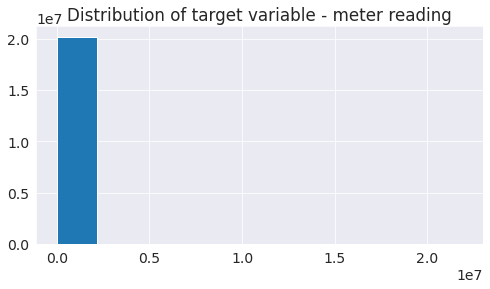

In [ ]:
plt.hist(train_raw_df['meter_reading']);
plt.title('Distribution of target variable - meter reading');

**Observations**
- Meter reading values are highly skewed. Due to the wide range of meter reading values (0-22 million) and high skewness it is impossible to visualize raw meter values.
- We will apply log transformation using `**np.log1p**` to make the distribution normal.

<ipython-input-54-1213e2fb915b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(train_raw_df['meter_reading']),


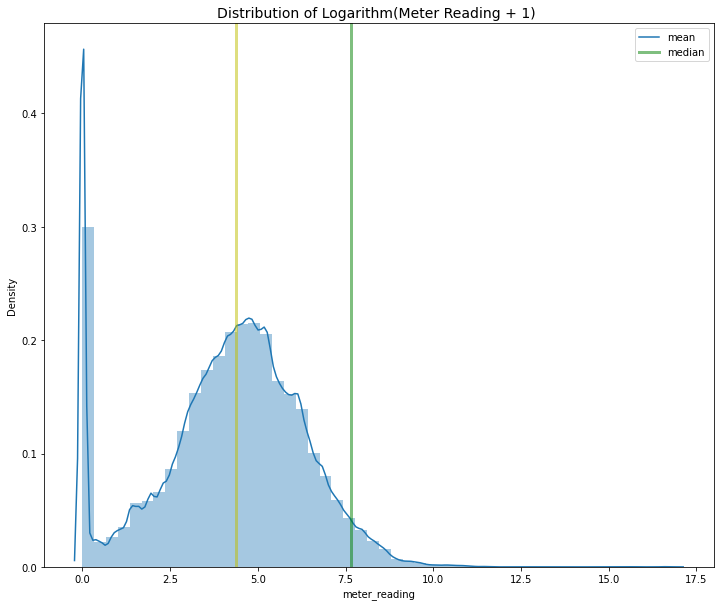

In [ ]:
# set the plot size
plt.figure(figsize=(12,10))

# set the histogram, mean and median
sns.distplot(np.log1p(train_raw_df['meter_reading']),
             kde=True)
plt.axvline(x=np.log1p(train_raw_df.meter_reading.mean()), 
            linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=np.log1p(train_raw_df.meter_reading.median()), 
            linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.title("Distribution of Logarithm(Meter Reading + 1) ", size=14)
plt.legend(["mean", "median"])

After applying log trasnformation to the meter reading values, a right skewed distribution is obtained. This skewness can be attributed to a large number of 0 and 1 `meter_reading` values. 0 meter reading values can be due to 
- zero consumption or
- missing values 

It is impossible for a building to consume zero units of energy at any point of time. Let us draw a distribution without zero meter reading values.



In [ ]:
reading_positive = train_raw_df[train_raw_df['meter_reading'] != 0]
reading_positive['log_meter_reading'] = np.log(reading_positive['meter_reading'])

<ipython-input-41-1454fe71dfe8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reading_positive['log_meter_reading'],


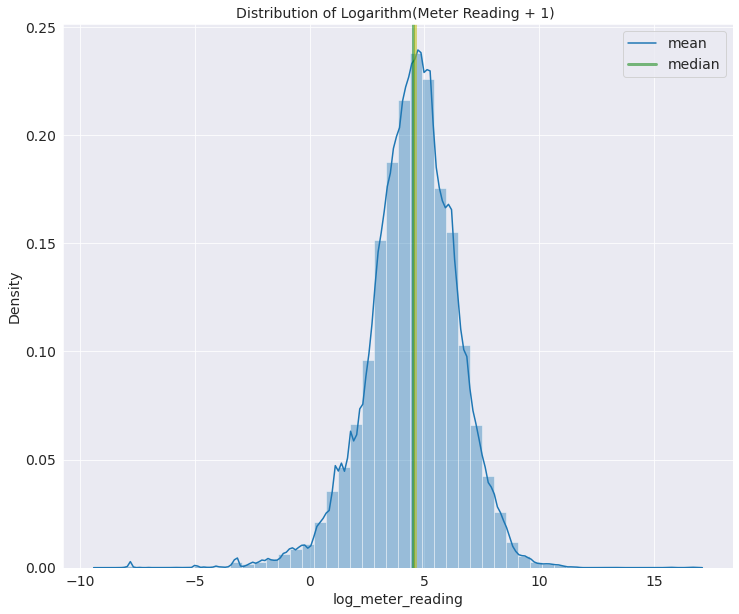

In [ ]:
# set the plot size
plt.figure(figsize=(12,10))

sns.distplot(reading_positive['log_meter_reading'],
             kde=True)        
plt.axvline(x=reading_positive['log_meter_reading'].mean(), 
            linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=reading_positive['log_meter_reading'].median(), 
            linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.title("Distribution of Logarithm(Meter Reading + 1) ", size=14)
plt.legend(["mean", "median"])

After dropping the zero meter readings, and taking the logarithmic values for the remaining meter readings, we obtain a normal distribution. This may imply missing data rather zero observations. For model training we can drop these values. 

#### **2.1.2 Meter Type vs Meter Reading**

Now we'll proceed to analyze which factors / features influence energy consumption. Let us first analyze energy consumption based on the meter used. 

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Get meter names from codes for better understanding
meter_dict = {0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}
train_raw_df['meter_name'] = train_raw_df.meter.map(meter_dict)


fig = make_subplots(
             rows=1, 
             cols=3,
             subplot_titles=("Count of meter type", "Total energy consumption by different meters", "Mean energy consumption by different meters"))

df = train_raw_df.groupby('meter_name')['building_id'].count().reset_index().sort_values(by='building_id', ascending=False)
fig.add_trace(
    go.Bar(x= df['meter_name'],
           y= df['building_id']),
    row=1,
    col=1
)

df = train_raw_df.groupby('meter_name')['meter_reading'].sum().reset_index().sort_values(by='meter_reading', ascending=False)
fig.add_trace(
    go.Bar(x= df['meter_name'],
           y= df['meter_reading']),
    row=1,
    col=2
)

df = train_raw_df.groupby('meter_name')['meter_reading'].mean().reset_index().sort_values(by='meter_reading', ascending=False)
fig.add_trace(
    go.Bar(x= df['meter_name'],
           y= df['meter_reading']),
    row=1,
    col=3
)



fig.update_layout(
    width=1400,
    height=600,
    showlegend=False,
    )

fig.show()

Observations 
- The number of electricity meters installed at different sites are comparatively much more than chilledwater, steam and hotwater meters.
- However, steam and chilled water meters show highest mean and total energy consumption
- It is much likely that the energy consumption by steam drive the overall energy consumption. 
- Thus meter type is a significant feature to determine the meter reading values.

#### **2.1.3 Time series analysis of Meter Reading**

Let us plot the time series of meter reading for training data. 

In [ ]:
title = 'Average Daily Meter Readings '
labels = ['Electricity', 'Chilled Water', 'Steam', 'Hotwater']

train_raw_df.set_index('timestamp', inplace=True)
train_daily_mean_meter = train_raw_df.groupby('meter').resample('D').meter_reading.mean().reset_index()
meter_avg_val = train_daily_mean_meter.pivot(index='timestamp', 
                              columns='meter', 
                              values='meter_reading')

fig = go.Figure()
ncols = meter_avg_val.shape[1]

# Create and style traces
for key in np.arange(ncols):
  fig.add_trace(go.Scatter(
      x= meter_avg_val.index,
      y= meter_avg_val.iloc[:,key].values,
      mode= 'lines',
      name= labels[key]
  ))

# Edit the layout
fig.update_layout(title= title,
                  xaxis_title='Year',
                  yaxis_title='Daily Energy Consumption in kWH')

fig.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=train_raw_df.meter.nunique(), cols=1,
                    subplot_titles=("Energy consumption by Electricity", "Energy consumption by Chilled water", "Energy consumption by Steam", "Energy consumption by Hot Water"))
freq_list = ['H', 'D', 'M']

for i in range(train_raw_df.meter.nunique()):
  for j in freq_list:
    df = train_raw_df[train_raw_df.meter == i][['timestamp', 'meter_reading']].set_index('timestamp').resample(j).meter_reading.mean().reset_index()
    fig.add_trace(go.Scatter(x= df.timestamp, 
                             y= df.meter_reading,
                             mode='lines',
                             name = j,
                             legendgroup = i+1
                             ),
                  row=i+1, #index for the subplot
                  col=1)
    

# Update height, width and title
fig.update_layout(title_text="Mean Energy Consumption By Meter Type - By Hours, Days & Months",
                  width=1200,
                  height=800,
                  legend_tracegroupgap = 100
                  )

fig.show()

Observations:
* **Electricity** - Consumption by electricity meters more or less remains constant throughout the year
* **Chilled Water** - There is a gradual increase in consumption from Jan to Sep followed by a sustained spike through Sep/Oct before declining. The spike suggests seasonality factors at play
* **Steam** - Consumption by steam meters mirrors the overall energy consumption. In fact, it seems to drive the overall energy trend as there is a sharp drop between Jul-Nov followed by a sudden spike in Nov. 
* **Hot Water** - The consumption shows a declining trend from the start to mid-year followed by an increase to the earlier peak. The decline can be attributed to seasonality (summer) where hot water consumption usually declines. 
- Given the trend for consumption is different for each meter type, it is imperative to analyse the consumption pattern by each site and by usage type


### **2.2 Building Data**



In this section we will analysze how meter reading is affected by different sites, buildings and its attributes.
1. **`square_feet`** - Area occupied by the building. It is generally presumed that energy consumption increases with area. 
2. **`year_built`** - year in which the buidling was built. 
3. **`floor_count`** - number of floors in the building. It generally has positive correlation with the `square_feet` and energy consumption.
4. **`primary_use`** - primary usage of building.

Let us first get some basic information about the buildings and their attributes.

In [ ]:
building_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [ ]:
building_raw_df.describe()

site_id  building_id    square_feet   year_built  floor_count
count  1449.000000  1449.000000    1449.000000   675.000000   355.000000
mean      6.952381   724.000000   92111.776398  1967.957037     3.740845
std       5.003432   418.434583  110769.950997    31.054030     3.333683
min       0.000000     0.000000     283.000000  1900.000000     1.000000
25%       3.000000   362.000000   23012.000000  1949.000000     1.000000
50%       5.000000   724.000000   57673.000000  1970.000000     3.000000
75%      13.000000  1086.000000  115676.000000  1995.000000     5.000000
max      15.000000  1448.000000  875000.000000  2017.000000    26.000000

**Observations**
- Meter readings were recorded at 16 different sites with 1449 buildings.
- Some building are very old and date back to as far as 1900, whereas the latest ones were built in the year 2017. 
- The smallest building has the gross area of 283 square feet, whereas the largets one 875,000 square feet area. Number of floors in the building also range from as low as 1 to as high as 26 floors.
- Columns `year_built` and `floor_count` have a large number of null values. We will see whether we need to impute them or drop them completely.

In [ ]:
get_null_info(weather_train_raw_df_eda)

 % Null values for site_id : 0.00 %
 % Null values for timestamp : 0.00 %
 % Null values for air_temperature : 0.04 %
 % Null values for cloud_coverage : 49.49 %
 % Null values for dew_temperature : 0.08 %
 % Null values for precip_depth_1_hr : 35.98 %
 % Null values for sea_level_pressure : 7.60 %
 % Null values for wind_direction : 4.48 %
 % Null values for wind_speed : 0.22 %


**Observations**
- As observed in the previous section, missing values for columns **`year_built`** and **`floor_count`** are more than 50%. 
- For **`year_built`** , it will be difficult to impute values from the recorded observations. We will see if we can do some feature engineering with this feature and extract some info.
- **`floor_count`** column too has large number of missing data. As it has high correlation with **`square_feet`** which has no missing values, we can drop this while building the model. 

#### **2.2.1 Meter Reading vs. Primary Use**

We'll now analyse how primary usage affects energy consumption. 

In [ ]:
pd.options.plotting.backend = "plotly"
train_raw_df_eda.groupby('primary_use')['building_id'].nunique().sort_values(ascending=False).plot.barh()

In [ ]:
pivot_df = train_raw_df_eda.groupby(['primary_use', 'meter'])['meter_reading'].mean().sort_values(ascending=False).reset_index()
pivot_df = pivot_df.pivot(index='primary_use', columns='meter', values='meter_reading')
pivot_df['Sum'] = pivot_df.sum(axis=1)
pivot_df.sort_values('Sum', ascending=False).drop('Sum', axis=1).plot.bar()

**Observations**
- Steam meters drives the mean energy consumption in **Education** and **Services** buildings, which also show the highest mean energy consumption pattern. 
- Steam energy consumption on an average is much more compared to other energy types. 
- Main source of energy consumption seems to be electricity given the count of electricity meters, yet these record the lowest mean consumption. 
- Though the number of buildings with usage type as services is less, yet the overall energy consumption is too high. **Thus services would be the ideal candidates for piloting energy conservation initiatives.**


#### 2.2.2 **Meter Reading vs Building Id/ Site Id**

We'll now analyse how meter reading varies across different sites throughout the year.

In [ ]:

fig = make_subplots(rows=train_raw_df_eda.site_id.nunique(),
                    cols=2,
                    subplot_titles=("Site 0", "Site 1", "Site 2", "Site 3",
                                    "Site 4", 'Site 5', 'Site 6', 'Site 7',
                                    'Site 8', 'Site 9', 'Site 10', 'Site 11',
                                    'Site 12', 'Site 13', 'Site 14', 'Site 15'))
freq_list = ['H', 'D']

for i in range(train_raw_df_eda.site_id.nunique()):
  for j in freq_list:
    df = train_raw_df_eda[train_raw_df_eda.site_id == i][['timestamp', 'meter_reading']].set_index('timestamp').resample(j).meter_reading.mean().reset_index()
    fig.add_trace(go.Scatter(x= df.timestamp, 
                             y= df.meter_reading,
                             mode='lines',
                             name = j,
                             legendgroup = i+1
                             ),
                  row= i//2 + 1, #index for the subplot
                  col= i%2 +1)
    

# Update height, width and title
fig.update_layout(title_text="Mean Energy Consumption By Meter Type for Different Sites - By Hours, Days & Months",
                  width=1200,
                  height=1800,
                  legend_tracegroupgap = 10
                  )

fig.show()

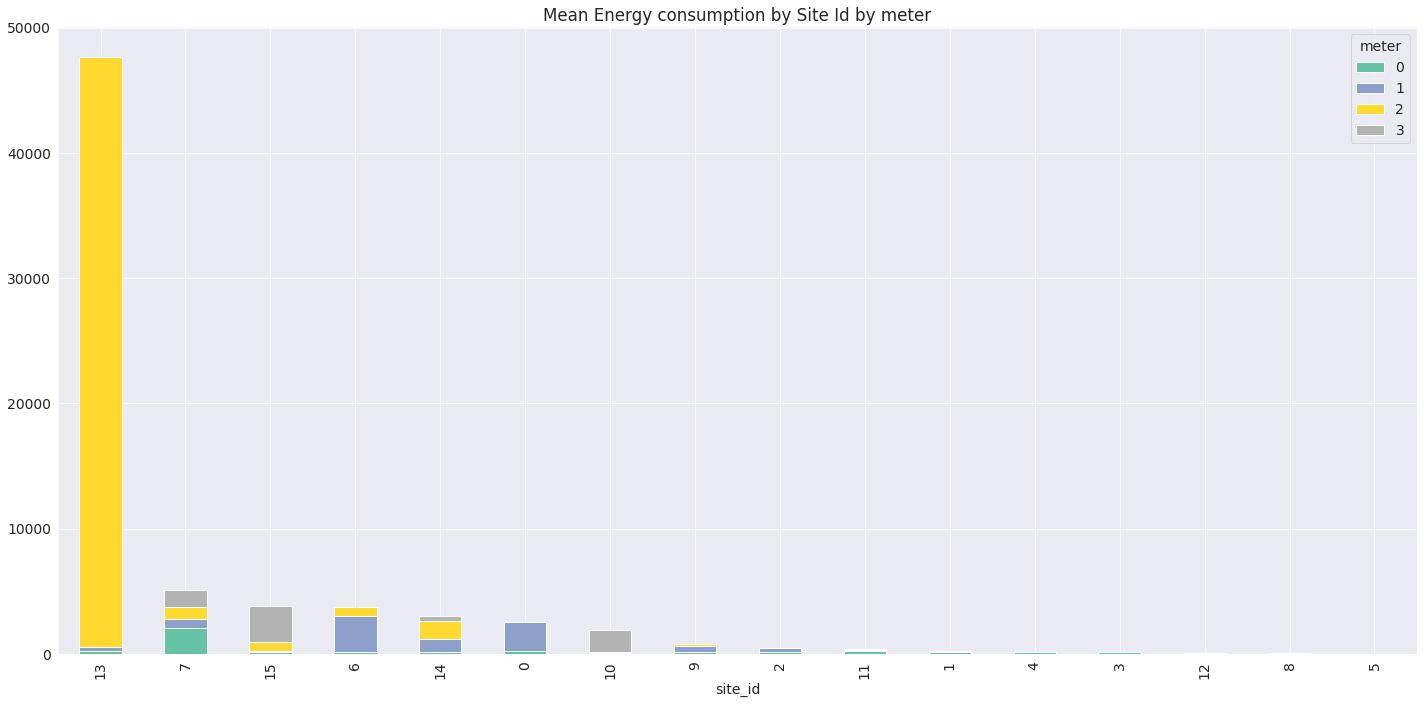

In [ ]:
pd.options.plotting.backend = "matplotlib"
df = train_raw_df_eda.groupby(['site_id','meter'])['meter_reading'].mean().sort_values(ascending = False).reset_index()
df = df.pivot(index='site_id', columns='meter', values='meter_reading')
df['Total_Consumption'] = df.sum(axis = 1)
df.sort_values('Total_Consumption', ascending = False).drop('Total_Consumption',axis = 1).plot(kind = 'bar', figsize = (20,10), colormap = 'Set2', title = 'Mean Energy consumption by Site Id by meter', 
                                                                                               stacked = True)
plt.tight_layout()

<b>Observations</b>
- Site 6, 9 and 13 show unusual energy consumption patterns. The trend for site 13 mirrors the overall trend. 
Steam (Meter No. 2) dominates the mean energy consumption for Site 13. It is also evident that steam consumption by site 13 drives the overall steam consumption. 
- Since the energy consumption by this site is much larger than any other sites, it would be prudent to explore the energy consumption by buildings in this site. 

We'll now go down to the building level and analyze the energy consumption by buildings. 

In [ ]:
df = train_raw_df_eda.groupby('building_id')['meter_reading'].mean().reset_index()
fig = px.bar(df, x='building_id', y='meter_reading')

fig.update_layout(
    width=800,
    height=500
)
fig.show()

There seems to be an outlier which is introducing noise in the data and distorting the overall energy consumption. 

In [ ]:
train_raw_df_eda.groupby('building_id')['meter_reading'].mean().sort_values(ascending = False)[:10]

building_id
1099    1.907446e+06
778     2.612168e+04
1197    2.222224e+04
1168    1.642528e+04
1159    1.199166e+04
1148    1.005890e+04
1021    8.170802e+03
1088    7.906980e+03
1284    7.314077e+03
1156    4.875422e+03
Name: meter_reading, dtype: float64

**Observations**

- As we can see building 1099 has energy consumption in million units, while others are in thousands. Clearly, this building is an outlier and it is better to drop this from the dataset before training our model.

### **2.3 Weather Set**
In this section, we will perform EDA for weather features and will try to find out which features can be used for our machine learning model.   

In [ ]:
weather_train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   site_id             139773 non-null  int64         
 1   timestamp           139773 non-null  datetime64[ns]
 2   air_temperature     139718 non-null  float64       
 3   cloud_coverage      70600 non-null   float64       
 4   dew_temperature     139660 non-null  float64       
 5   precip_depth_1_hr   89484 non-null   float64       
 6   sea_level_pressure  129155 non-null  float64       
 7   wind_direction      133505 non-null  float64       
 8   wind_speed          139469 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 9.6 MB


In [ ]:
weather_train_raw_df_eda.describe()

site_id  air_temperature  cloud_coverage  dew_temperature  \
count  139773.000000    139718.000000    70600.000000    139660.000000   
mean        7.478977        14.418106        2.149306         7.350158   
std         4.604744        10.626595        2.599150         9.790235   
min         0.000000       -28.900000        0.000000       -35.000000   
25%         3.000000         7.200000        0.000000         0.600000   
50%         7.000000        15.000000        2.000000         8.300000   
75%        11.000000        22.200000        4.000000        14.400000   
max        15.000000        47.200000        9.000000        26.100000   

       precip_depth_1_hr  sea_level_pressure  wind_direction     wind_speed  
count       89484.000000       129155.000000   133505.000000  139469.000000  
mean            0.983047         1016.158038      180.526632       3.560527  
std             8.463678            7.629684      111.523629       2.335874  
min            -1.000000          968.200000        0.000000       0.000000  
25%             0.000000         1011.800000       80.000000       2.100000  
50%             0.000000         1016.400000      190.000000       3.100000  
75%             0.000000         1020.800000      280.000000       5.000000  
max           343.000000         1045.500000      360.000000      19.000000

In [ ]:
weather_train_raw_df_eda.timestamp.min(),weather_train_raw_df_eda.timestamp.max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2016-12-31 23:00:00'))

<b>Observations</b>
- There are 7 weather features `air_temperature`, `cloud_coverage`, `dew_temperature`, `precip_depth_1_hr`, `sea_level_pressure`, `wind_direction`, `wind_speed`. 
- The weather feature readings are recorded at the site level. Hence, these will influence all the buildings at the same sites.
- Time period for the data is same as the training set
- All weather features have some missing observations. 

#### **2.3.1 Univariate analysis of weather features**

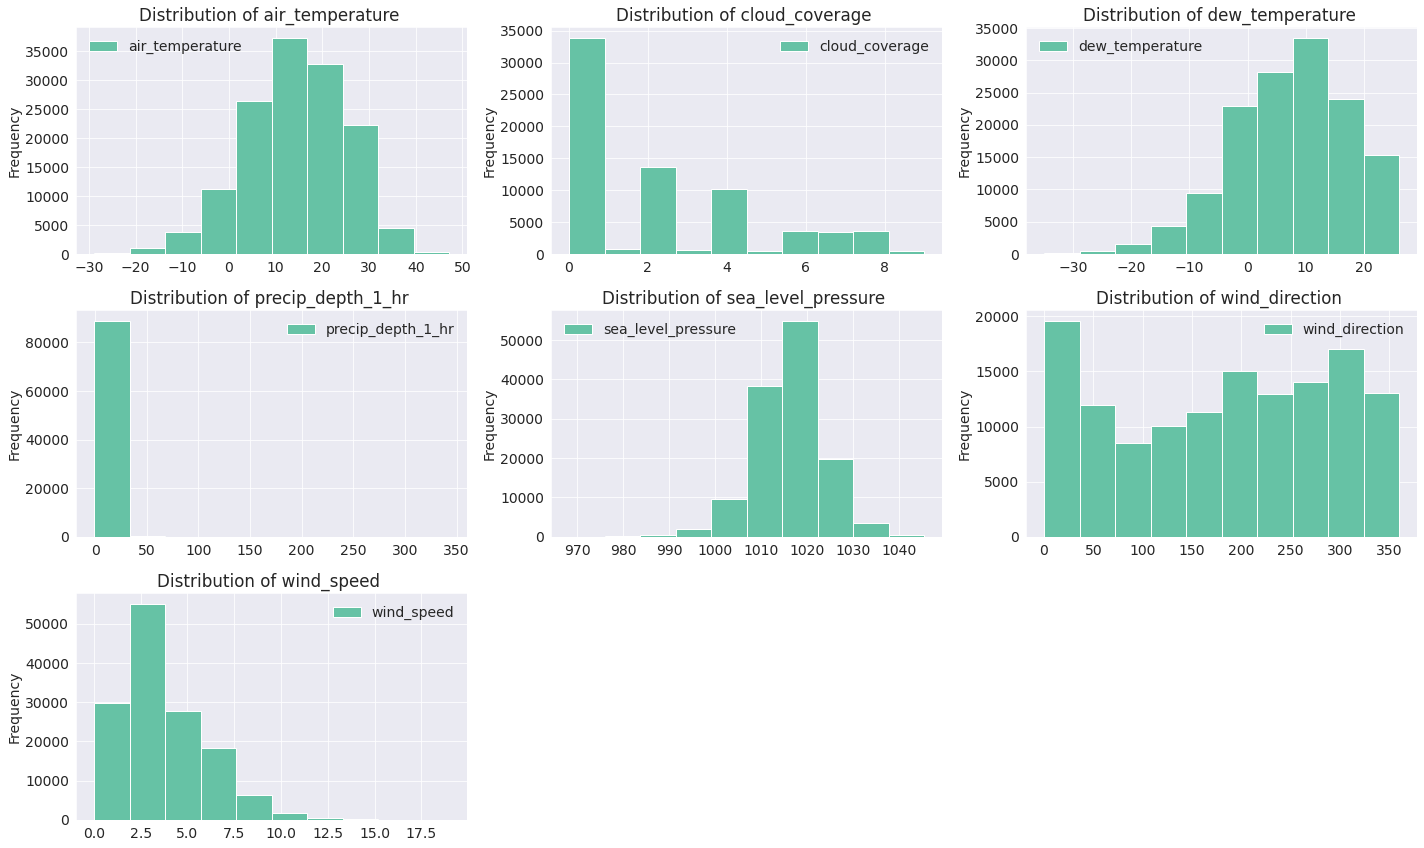

In [ ]:
pd.options.plotting.backend = "matplotlib"

columns = weather_train_raw_df_eda.columns[2:]
plt.figure(figsize=(20,12))
for index, column in enumerate(columns):
    plt.subplot(3,3,index+1)
    weather_train_raw_df_eda[column].plot(kind='hist', label=column, colormap = 'Set2', title='Distribution of {} '.format(column))
    plt.legend(frameon = False)

plt.tight_layout()    
plt.show()

**Observations**
- Air temperature, Dew Temperature, Sea Level Pressure and Wind Speed follow normal distribution
- Distribution for precipiation is highly skewed.

#### **2.3.2 Time series of weather features**

In this section we'll  plot average daily readings for weather features. This will help us in determining the trend of these features over the year, and figuring out which of these features can be taken as inputs for the model.



In [ ]:
subplot_titles = ('Daily avg reading for Air Temperature', 'Daily avg reading for Dew Temperature', 'Daily avg reading for Cloud Coverage', 'Daily avg reading for Wind Direction', 
                  'Daily avg reading for Sea Level Pressure', 'Daily avg reading for Wind Speed')

fig = make_subplots(rows=3, cols=2,
                    subplot_titles=subplot_titles)

df = weather_train_raw_df_eda[['timestamp', 'air_temperature']].set_index('timestamp').resample('D')['air_temperature'].mean().reset_index()
fig.add_trace(go.Scatter(x= df.timestamp, 
                         y= df.air_temperature,
                         mode='lines',
                         ),
                        row=1, col=1
              )

df = weather_train_raw_df_eda[['timestamp', 'dew_temperature']].set_index('timestamp').resample('D')['dew_temperature'].mean().reset_index()
fig.add_trace(go.Scatter(x= df.timestamp, 
                             y= df.dew_temperature,
                             mode='lines',
                            ),
                        row=1, col=2
              )



df = weather_train_raw_df_eda[['timestamp', 'cloud_coverage']].set_index('timestamp').resample('D')['cloud_coverage'].mean().reset_index()
fig.add_trace(go.Scatter(
                        x=df.timestamp,
                        y=df.cloud_coverage, 
                        mode='lines'),
                        row=2, col=1
)

df = weather_train_raw_df[['timestamp', 'wind_direction']].set_index('timestamp').resample('D')['wind_direction'].mean().reset_index()
fig.add_trace(go.Scatter(
                        x=df.timestamp,
                        y=df.wind_direction, 
                        mode='lines'),
                        row=2, col=2
)


df = weather_train_raw_df_eda[['timestamp', 'sea_level_pressure']].set_index('timestamp').resample('D')['sea_level_pressure'].mean().reset_index()
fig.add_trace(go.Scatter(
                        x=df.timestamp,
                        y=df.sea_level_pressure, 
                        mode='lines'),
                        row=3, col=1
)

df = weather_train_raw_df_eda[['timestamp', 'wind_speed']].set_index('timestamp').resample('D')['wind_speed'].mean().reset_index()
fig.add_trace(go.Scatter(
                        x=df.timestamp,
                        y=df.wind_speed, 
                        mode='lines'),
                        row=3, col=2
)


# Update Title
fig.update_layout(title_text= "Daily Average readings for Weather Features during 2016",
                  showlegend=False)
fig.show()

<b>Observations</b>
- Air Temperature and Dew Temperature seem to be highly correlated. Values for these two features increase and then decrease during the period.
- Cloud coverage remains constant with slighlty less deviation throughout the year.
-   Values for Wind Speed and sea level pressure oscillate up and down during the said period.

#### **2.3.3. Meter Reading vs Weather features correlation**


Let us now find the correlation between weather features and mean energy consumption for each meter using a heat map. 

<ipython-input-105-bb29ff2fef21>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



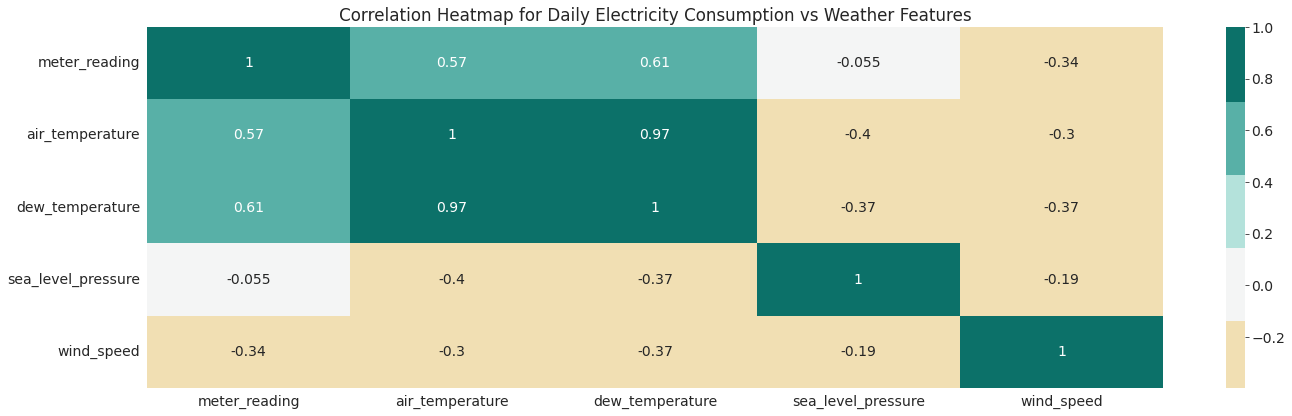

In [ ]:
corr_df = train_raw_df_eda[train_raw_df_eda.meter==0][['timestamp', 'meter_reading', 'air_temperature', 'dew_temperature', 'sea_level_pressure', 'wind_speed']].set_index('timestamp').resample('D').mean().reset_index().corr()

#Create a heatmap 
plt.figure(figsize=(20,6))
plt.subplot(1,1,1, title = 'Correlation Heatmap for Daily Electricity Consumption vs Weather Features')
sns.heatmap(corr_df, annot=True, cmap=sns.color_palette("BrBG", 7), center = 0) 
plt.tight_layout()





**Observations**
-  Air temperature and Dew Temperature have a positive correlation with energy consumption by electricity meters

<ipython-input-106-36ac555d7295>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



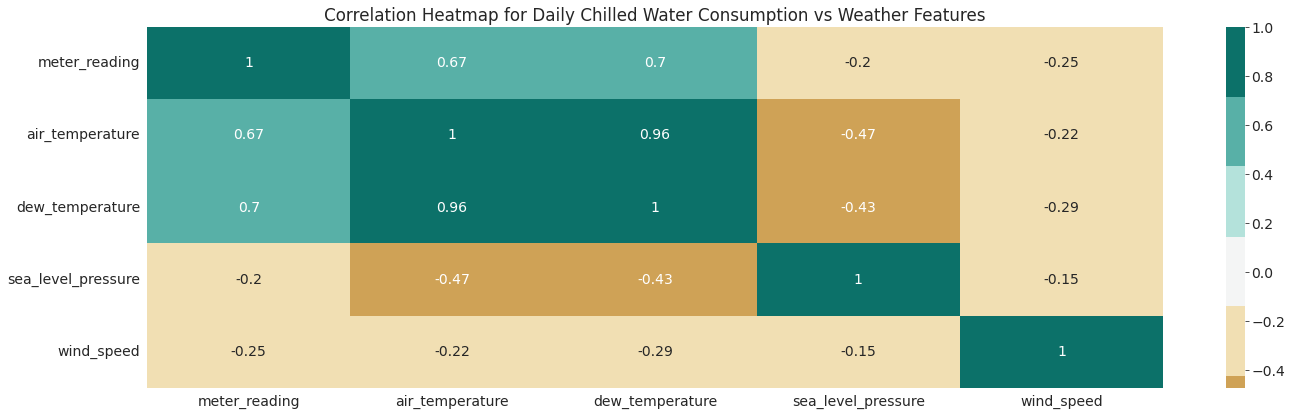

In [ ]:
corr_df = train_raw_df_eda[train_raw_df_eda.meter==1][['timestamp', 'meter_reading', 'air_temperature', 'dew_temperature', 'sea_level_pressure', 'wind_speed']].set_index('timestamp').resample('D').mean().reset_index().corr()

#Create a heatmap 
plt.figure(figsize=(20,6))
plt.subplot(1,1,1, title = 'Correlation Heatmap for Daily Chilled Water Consumption vs Weather Features')
sns.heatmap(corr_df, annot=True, cmap=sns.color_palette("BrBG", 7), center = 0) 
plt.tight_layout()

**Observations**
- Air Temperature and Dew Temperature are positively correlated with each other as well as with the energy consumption by chilled water meters. 
- Sea Level pressure and Wind speed have negative correlation with chilled water energy consumption

<ipython-input-107-5b643ee194d4>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



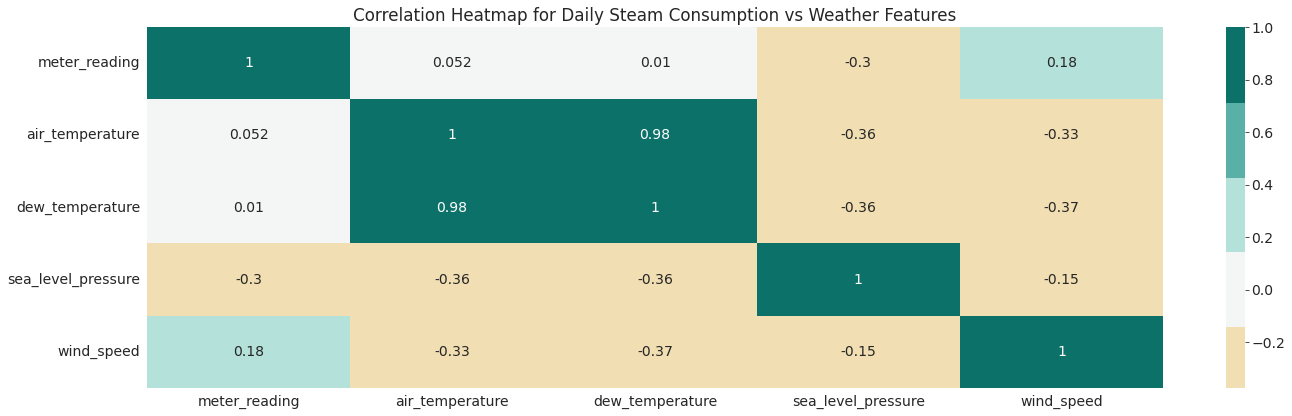

In [ ]:
corr_df = train_raw_df_eda[train_raw_df_eda.meter==2][['timestamp', 'meter_reading', 'air_temperature', 'dew_temperature', 'sea_level_pressure', 'wind_speed']].set_index('timestamp').resample('D').mean().reset_index().corr()

#Create a heatmap 
plt.figure(figsize=(20,6))
plt.subplot(1,1,1, title = 'Correlation Heatmap for Daily Steam Consumption vs Weather Features')
sns.heatmap(corr_df, annot=True, cmap=sns.color_palette("BrBG", 7), center = 0) 
plt.tight_layout()

**Observations**
- Air Temperature and Dew Temperature have mild positive correlation with Steam energy consumption. 
- Sea Level pressure has negative correlation with Steam energy consumption

<ipython-input-108-31b57794d687>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



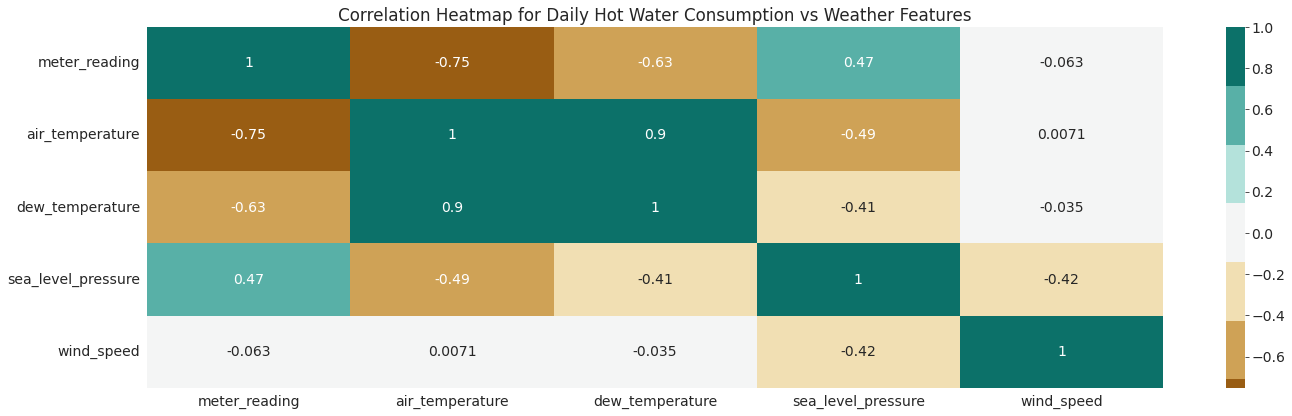

In [ ]:
corr_df = train_raw_df_eda[train_raw_df_eda.meter==3][['timestamp', 'meter_reading', 'air_temperature', 'dew_temperature', 'sea_level_pressure', 'wind_speed']].set_index('timestamp').resample('D').mean().reset_index().corr()

#Create a heatmap 
plt.figure(figsize=(20,6))
plt.subplot(1,1,1, title = 'Correlation Heatmap for Daily Hot Water Consumption vs Weather Features')
sns.heatmap(corr_df, annot=True, cmap=sns.color_palette("BrBG", 7), center = 0) 
plt.tight_layout()

**Observations**
- Air temperature and Dew temperature have negative correlation with Hot Water Consumption.

**Summary**
- Air temperature and Dew temperature follow a strong positive correlation with each other. We shall use only one of  these (`air_temperature`) as an input to our model. 
- Hot water consumption came down with an increase in air temperature and dew temperture while chilled and electricity consumption increased. 


In [ ]:
del train_raw_df_eda, weather_train_raw_df_eda, building_raw_df_eda
gc.collect()

4

## **3. Prepare the Dataset for Training/ Feature Engineering**




### **3.1 Reduce the memory size**
We are dealing with large size datasets (20 and 40 miilion rows). To save memory space we will use a function created [here]([https://www.kaggle.com/code/caesarlupum/ashrae-start-here-a-gentle-introduction/notebook]) to reduce the memory size of the datasets. The function converts the data types in such a way that it takes less space in the memory. 

In [ ]:
## Function to reduce the dataframe size
def reduce_memory_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    

In [ ]:
reduce_memory_usage(building_raw_df)
reduce_memory_usage(test_raw_df)
reduce_memory_usage(train_raw_df)
reduce_memory_usage(weather_train_raw_df)
reduce_memory_usage(weather_test_raw_df)

import gc
gc.collect()


Mem. usage decreased to  0.03 Mb (60.3% reduction)
Mem. usage decreased to 596.49 Mb (53.1% reduction)
Mem. usage decreased to 289.19 Mb (53.1% reduction)
Mem. usage decreased to  3.07 Mb (68.1% reduction)
Mem. usage decreased to  6.08 Mb (68.1% reduction)


4

### **3.2 Weather Data Time Alignment**

According to this [thread](https://www.kaggle.com/c/ashrae-energy-prediction/discussion/114483#latest-659257), it looks like weather observations are not in local time format. There are discrepancies between measured timestamps and weather timestamps. 

In this section, i will use the approach shared by the [notebook](https://www.kaggle.com/code/frednavruzov/aligning-temperature-timestamp/notebook) to align weather data timestamps. 


In [ ]:
temp_df = weather_train_raw_df[['site_id', 'timestamp', 'air_temperature']]
temp_df['temp_rank'] = temp_df.groupby(['site_id', temp_df.timestamp.dt.date])['air_temperature'].rank('average')
df_heatmap = temp_df.groupby(['site_id', temp_df.timestamp.dt.hour])['temp_rank'].mean().unstack(level=1)

Text(0.5, 1.0, 'Mean temperature rank by hour (init timestamps)')

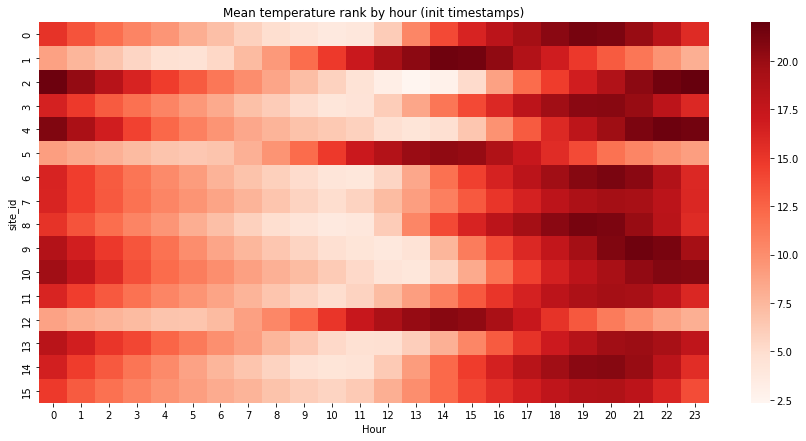

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_heatmap,cmap='Reds');
plt.xlabel('Hour')
plt.title('Mean temperature rank by hour (init timestamps)')

In [ ]:
def time_alignment(df):
  temp_df=df[['site_id','timestamp','air_temperature']]
  # calculate ranks of hourly temperatures within date/site_id chunks
  temp_df['temp_rank']=temp_df.groupby(['site_id', temp_df.timestamp.dt.date],)['air_temperature'].rank('average')
  # create 2D dataframe of site_ids (0-16) x mean hour rank of temperature within day (0-23)
  df_2d=temp_df.groupby(['site_id', temp_df.timestamp.dt.hour])['temp_rank'].mean().unstack(level=1)
  # align scale, so each value within row is in [0,1] range
  df_2d = df_2d / df_2d.max(axis=1).values.reshape((-1,1))
  # sort by 'closeness' of hour with the highest temperature
  site_ids_argmax_maxtemp=pd.Series(np.argmax(df_2d.values,axis=1)).sort_values().index
  # assuming (1,5,12) tuple has the most correct temp peaks at 14:00
  site_ids_offsets= pd.Series(df_2d.values.argmax(axis=1) - 14)
  # align rows so that site_id's with similar temperature hour's peaks are near each other
  df_2d=df_2d.iloc[site_ids_argmax_maxtemp]
  temp_df['offset'] = temp_df.site_id.map(site_ids_offsets)
  # add offset
  temp_df['timestamp_aligned'] = (temp_df.timestamp - pd.to_timedelta(temp_df.offset, unit='H'))
  # replace the timestamp with aligned timestamps in the original dataframe
  df['timestamp']=temp_df['timestamp_aligned']
  return df

In [ ]:
weather_train_raw_df=time_alignment(weather_train_raw_df)
weather_test_raw_df=time_alignment(weather_test_raw_df)

In [ ]:
temp_df = weather_train_raw_df[['site_id', 'timestamp', 'air_temperature']]
temp_df['temp_rank'] = temp_df.groupby(['site_id', temp_df.timestamp.dt.date])['air_temperature'].rank('average')
df_heatmap = temp_df.groupby(['site_id', temp_df.timestamp.dt.hour])['temp_rank'].mean().unstack(level=1)

Text(0.5, 1.0, 'Mean temperature rank by hour (init timestamps)')

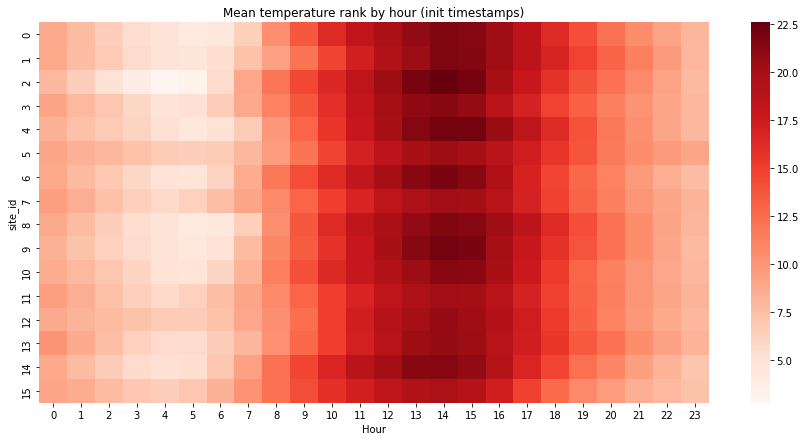

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df_heatmap,cmap='Reds');
plt.xlabel('Hour')
plt.title('Mean temperature rank by hour (init timestamps)')

### **3.3 Fill/Remove Missing Values**

As machine learning models can't handle null values , we'll have to fill/ drop features with null values. 

As discussed in the EDA section, we will drop **`floor_count`** as it has high correlation with **`square_feet`**. We can also drop **`year_built`** and use an engineered feature **`building_age`** instead of it.

For weather features, we will fill missing values by  imputation. 




We'll define a function that takes a dataframe and fills missing observations by imputing.As we are dealing with a time series data, we'll calculate daily mean observations/month for each site and impute them for missing values. In this way, seasonality is taken care off and we won't have wide deviations in data. 

In [ ]:
def fill_weather_features (df):

  # Extract day and month from timestamp which will be used for filling mean values
  df['day'] = df['timestamp'].dt.day
  df['month'] = df['timestamp'].dt.month 
  df = df.set_index(['site_id','day','month'])

  #impute missing air temperature values by daily mean air temperature for each site per month
  air_temperature_filler = pd.DataFrame(df.groupby(['site_id', 'day', 'month'])['air_temperature'].mean()
                                      , columns =['air_temperature'])
  #update the weather dataset
  df.update(air_temperature_filler,overwrite=False)
  del air_temperature_filler
  gc.collect()

  
  #impute missing sea level pressure values by daily mean sea level pressure for each site per month
  sea_level_pressure_filler = pd.DataFrame(df.groupby(['site_id', 'day', 'month'])['sea_level_pressure'].mean()
                                      , columns =['sea_level_pressure'])

  #forward fill any missing values still not filled
  sea_level_pressure_filler.fillna(method='ffill', inplace=True)

  #update the weather dataset
  df.update(sea_level_pressure_filler,overwrite=False)
  del sea_level_pressure_filler
  gc.collect()

 
  #impute missing wind speed values by daily mean wind speed for each site per month
  wind_speed_filler = pd.DataFrame(df.groupby(['site_id', 'day', 'month'])['wind_speed'].mean()
                                      , columns =['wind_speed'])
  #update the weather dataset
  df.update(wind_speed_filler,overwrite=False)
  del wind_speed_filler
  gc.collect()

  df = df.reset_index()
  df.drop(['day','month'], axis = 1, inplace=True)
  return df

In [ ]:
weather_train_raw_df = fill_weather_features(weather_train_raw_df)
weather_test_raw_df = fill_weather_features(weather_test_raw_df)

In [ ]:
# drop other features 
columns = ['cloud_coverage', 'dew_temperature', 'precip_depth_1_hr', 'wind_direction']
weather_train_raw_df.drop(columns, inplace=True, axis=1)
weather_test_raw_df.drop(columns, inplace=True, axis=1)

In [ ]:
weather_train_raw_df.isna().sum()

site_id               0
timestamp             0
air_temperature       0
sea_level_pressure    0
wind_speed            0
dtype: int64

In [ ]:
weather_test_raw_df.isna().sum()

site_id               0
timestamp             0
air_temperature       0
sea_level_pressure    0
wind_speed            0
dtype: int64

### **3.4 Remove Outliers and Invalid Data**
In this section we'll remove outliers that we discovered during exploratory data analysis. 


In [ ]:
train_raw_df = train_raw_df[train_raw_df['building_id'] != 1099 ]
train_raw_df = train_raw_df[train_raw_df['meter_reading'] != 0 ]

###**3.5 Feature Engineering**
In this section we will create new features that can inform our model and help us predict the target variable. 


#### **3.5.1 Encode Categorical Columns**

Machine learning model accept only numerical values. Therefore, any categorical variable with object data type needs to be converted using encoding techniques. There are several options 
- Label Encoding 
- One Hot Encoding 

We'll use label encoding to encode `primary_use` column.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode categorical column primary use
le = LabelEncoder()
building_raw_df["primary_use"] = le.fit_transform(building_raw_df["primary_use"])

#### **3.5.2 Engineered Feature : `building_age`, `log_meter_reading`**
In the preceding section we had proposed to drop **`year_built`** column and use an engineered feature **`building_age`** instead of it. This column will depict the present age of the building. It is calculated by subtracting the year built from the present year. We will also plot the distribution of this variabel to see if it is normal or skewed. 


In [ ]:
current_year = pd.datetime.now().year
building_raw_df['building_age'] = current_year - building_raw_df['year_built']
building_raw_df.fillna(round(building_raw_df.building_age.mean(),0),
                inplace=True)
building_raw_df.drop(columns=['year_built'], inplace=True)


<ipython-input-22-22ed0cab64d1>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  current_year = pd.datetime.now().year


<ipython-input-36-7aee867297e0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(building_raw_df['building_age'])


<Axes: xlabel='building_age', ylabel='Density'>

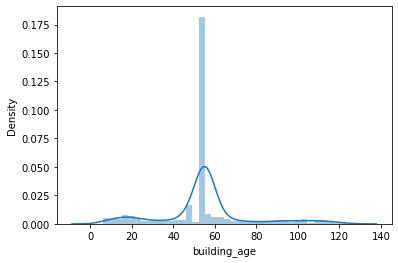

In [ ]:
sns.distplot(building_raw_df['building_age'])

We'll apply logarithmic function to the target variable

In [ ]:
train_raw_df['log_meter_reading'] = np.log1p(train_raw_df["meter_reading"])

Before proceeding with the next feature we will merge the training set with auxillary sets as well test set with its auxillary sets. 

In [ ]:
#merge training set with its auxillary set
train_raw_df = pd.merge(train_raw_df , building_raw_df, how = 'left') 
train_raw_df = pd.merge(train_raw_df, weather_train_raw_df , on = ['site_id','timestamp'], how = 'left')

In [ ]:
# fill any missing values after merger 
train_raw_df['air_temperature'].fillna(method='ffill', inplace=True)
train_raw_df['sea_level_pressure'].fillna(method='ffill', inplace=True)
train_raw_df['wind_speed'].fillna(method='ffill', inplace=True)
reduce_memory_usage(train_raw_df)

Mem. usage decreased to 716.50 Mb (29.3% reduction)


In [ ]:
# merge the test data with auxillary datasets
test_raw_df = pd.merge(test_raw_df , building_raw_df, how = 'left') 
test_raw_df = pd.merge(test_raw_df, weather_test_raw_df , on = ['site_id','timestamp'], how = 'left')

In [ ]:
# fill any missing values after merger
test_raw_df['air_temperature'].fillna(method='ffill', inplace=True)
test_raw_df['sea_level_pressure'].fillna(method='ffill', inplace=True)
test_raw_df['wind_speed'].fillna(method='ffill', inplace=True)
reduce_memory_usage(test_raw_df)

Mem. usage decreased to 1550.87 Mb (27.8% reduction)


In [ ]:
import gc
gc.collect()

0

### **3.5.3 Engineered Feature - Extract Timestamp**

In this section we will create new features that can inform our model and help us predict the target variable. 

As our dataset is a time-series one, using `timestamp` column alone will not inform much to our model. Therefore, we will extract datetime features from timestamp column. 

In [ ]:
# function to extract date time features from timestamp column 
def extract_timestamp (df):
  df['year'] = df['timestamp'].dt.year
  df['month'] = df['timestamp'].dt.month
  df['weekday'] = df['timestamp'].dt.weekday
  df['day'] = df['timestamp'].dt.day
  df['hour'] = df['timestamp'].dt.hour
  return df

In [ ]:
train_raw_df = extract_timestamp (train_raw_df)
reduce_memory_usage(train_raw_df)

Mem. usage decreased to 821.36 Mb (42.0% reduction)


In [ ]:
test_raw_df = extract_timestamp (test_raw_df)
reduce_memory_usage(test_raw_df)

Mem. usage decreased to 1789.47 Mb (43.0% reduction)


### **3.6 Feature Selection - Extract Input & Target variable**

In [ ]:
input_cols = ['meter', 'building_id','site_id', 'primary_use', 'square_feet', 'building_age', 
              'air_temperature', 'sea_level_pressure', 'wind_speed', 'hour', 'day','weekday', 'month']
target_col = ['log_meter_reading']


## **4. Train & Evaluate Different Models**

### **4.1 Split Training & Validation Set**

In this section, we are going to split the training set into training and validation set. 
- **Training set** `train_df` will inform the model on how the target is related to the input features
- **Validation set** 'val_df` will help us understand how well the model generalizes learnings on a newly introduced dataset

As the problem is a time-series one , we will like to split training and validation set sequentially and not use a random split approach. We will use 75% as the training data and 25% (last quarter) as the validation data.

In [ ]:
# split train and validation set into 75 and 25 percent sequentially
train_df = train_raw_df[:int(3 * train_raw_df.shape[0] / 4)]
val_df = train_raw_df[int(3 * train_raw_df.shape[0] / 4):]

In [ ]:
# make sure train and validation sets shape align
print("Shape of the training set is: ", train_df.shape)
print("Shape of the validation set is: ", val_df.shape)


Shape of the training set is:  (13743418, 18)
Shape of the validation set is:  (4581140, 18)


In [ ]:
train_inputs = train_df[input_cols]
val_inputs = val_df[input_cols]
train_targets = train_df[target_col]
val_targets = val_df[target_col]

In [ ]:
test_inputs = test_raw_df[input_cols]


### **4.2 Train Harcoded & Baseline Models**
In this section we'll train and evaluate hardcoded and baseline models.
- **Hardcoded Model** - For a regression problem, it can be a central tendency measure such as mean or the median. We will be using a model that predicts average meter reading. 
- **Baseline Model** - Linear Regression Model

Since this is a regression problem and the competition's result will be evaluated for root mean squared. However, as we have already applied log1p transformation to the target, so throughout the project we are going to use RMSE (root mean squared error) as the single evaluation metric. 

![](https://i.imgur.com/uOPJHSa.png)

### **4.2.1 Train & Evaluate Harcoded Model**
Let's create a simple model that always predicts the average meter reading.

In [ ]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [ ]:
mean_model = MeanRegressor()

In [ ]:
mean_model.fit(train_inputs, train_targets)

In [ ]:
mean_model.mean

log_meter_reading    4.135555
dtype: float64

In [ ]:
train_preds = mean_model.predict(train_inputs)

In [ ]:
train_preds

array([4.13555513, 4.13555513, 4.13555513, ..., 4.13555513, 4.13555513,
       4.13555513])

In [ ]:
val_preds = mean_model.predict(val_inputs)
val_preds

array([4.13555513, 4.13555513, 4.13555513, ..., 4.13555513, 4.13555513,
       4.13555513])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse (targets, predictions):
  return mean_squared_error(targets, predictions, squared=False)


In [ ]:
train_rmse = rmse(train_targets, train_preds)
train_rmse

2.160380770550134

In [ ]:
val_rmse = rmse(val_targets, val_preds)
val_rmse

2.1032648048743483

The training and validation RMSE's are 2.1603 and 2.1032, which are almost similar. That means the model is performing same on both training and validation sets. 

We'll define a few resuable functions to evaluate the model and submit predicts for evaluation on the Kaggle platform.


In [ ]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = rmse(train_targets, train_preds)
    val_preds = model.predict(val_inputs)
    val_rmse = rmse(val_targets, val_preds)
    return train_rmse, val_rmse

In [ ]:
from tqdm import tqdm
def predict_and_submit(model, fname):
  i=0
  result= []
  step_size = 50000
  for j in tqdm(range(int(np.ceil(test_inputs.shape[0]/50000)))):
      result.append(np.expm1(model.predict(test_inputs.iloc[i:i+step_size])))
      i+=step_size
  
  result = np.concatenate(result)
  sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
  sub_df['meter_reading'] = result
  sub_df.to_csv(fname, index=None)
  return sub_df

### **4.2.2 Linear Regression Model**
We'll train a linear regression model as our baseline, whihc tries to express the target as weighted sum of inputs.


In [ ]:
# Create a Linear Regression Model
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()

In [ ]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [ ]:
evaluate(linreg_model)

(1.4505281681340532, 1.4776462424897727)

The training and validation loss are 1.4505 and 1.4776 respectively. Though there is some improvement when compared to the harcoded model, still there is lot of scope for improvement. 

Let us evaluate the model on test data and submit the predictions on Kaggle.

In [ ]:
predict_and_submit(linreg_model, 'linreg_submission.csv')

100%|██████████| 834/834 [00:06<00:00, 130.64it/s]


row_id  meter_reading
0                0      53.242081
1                1      49.623564
2                2      45.012301
3                3      56.234551
4                4      84.912571
...            ...            ...
41697595  41697595      32.502811
41697596  41697596      48.629124
41697597  41697597      63.183013
41697598  41697598      66.295513
41697599  41697599      94.826013

[41697600 rows x 2 columns]

![](https://i.imgur.com/NpFFosU.jpg)

The score on Kaggle dataset is too high. We'll now train our model on boosting models and try to improve our score.

### **4.3 LightGBM Model**

In [ ]:
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor(random_state=42, n_jobs=-1)

In [ ]:
lgbm_model.fit(train_inputs, train_targets)

LGBMRegressor(random_state=42)

In [ ]:
evaluate(lgbm_model)

(0.8416303394597481, 0.885329045777168)

The training and validation loss are 0.84163 and 0.88532 respectively. There is still some overfitting which can be solved by hyperparameter tuning. 

Let us evaluate the model on test data.

In [ ]:
predict_and_submit(lgbm_model, 'lgbm_submission.csv')

100%|██████████| 834/834 [03:27<00:00,  4.02it/s]


row_id  meter_reading
0                0     171.814225
1                1      47.294415
2                2      31.523189
3                3     159.420916
4                4     675.161768
...            ...            ...
41697595  41697595      11.945778
41697596  41697596       7.435157
41697597  41697597      10.544613
41697598  41697598      76.272906
41697599  41697599       5.014927

[41697600 rows x 2 columns]

![](https://i.imgur.com/nLNIKSe.jpg)

### **4.4 XGBoost Model**

In [ ]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [ ]:
xgb_model.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
evaluate(xgb_model)

(0.6545944, 0.7560698)

The training and validation rmse are 0.6545 and 0.7560 respectively. We'll  perform hyper parameter tuning in the next step to reduce overfitting. 
Let us evaluate the model on test data.

In [ ]:
predict_and_submit(xgb_model, 'xgb_submission.csv')

100%|██████████| 834/834 [02:27<00:00,  5.67it/s]


row_id  meter_reading
0                0     103.574722
1                1      52.531582
2                2       7.663197
3                3     178.715271
4                4     361.166870
...            ...            ...
41697595  41697595       5.380791
41697596  41697596       4.427929
41697597  41697597       8.097425
41697598  41697598     103.184860
41697599  41697599       6.977947

[41697600 rows x 2 columns]

![](https://i.imgur.com/DQXCdfU.jpg)

As XGBoost model has performed comparatively better on the test dataset, we'll tune hyperparameters on this model and see how can we improve on our scores. 

## **5. Tune Hyperparameters**

We'll train hyperparameters for the XGBoost model. We'll tune the most impactful hyperparameter first for e.g. n_estimators, and with this value of the first hyperparameter, tune the next most impactful parameter. 

Let's define a helper function for trying different hyperparameters. 


In [ ]:
def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = rmse(train_targets, model.predict(train_inputs))
    val_rmse = rmse(val_targets, model.predict(val_inputs))
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [ ]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

### **No. of Trees**

In [ ]:
from xgboost import XGBRegressor

CPU times: user 1h 4min 53s, sys: 2min 41s, total: 1h 7min 34s
Wall time: 50min 6s


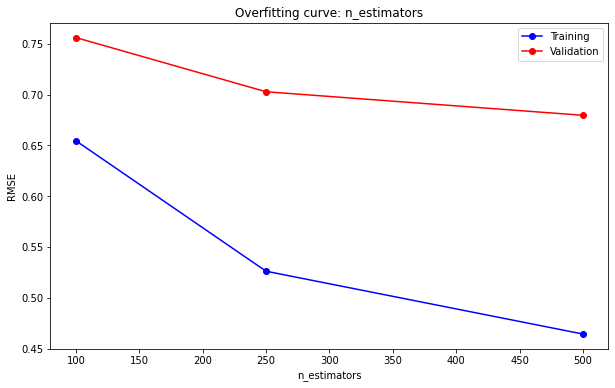

In [ ]:
%%time 
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

In [ ]:
best_params['n_estimators'] = 250

### **Max Depth**

CPU times: user 47min 31s, sys: 2min 10s, total: 49min 42s
Wall time: 36min 29s


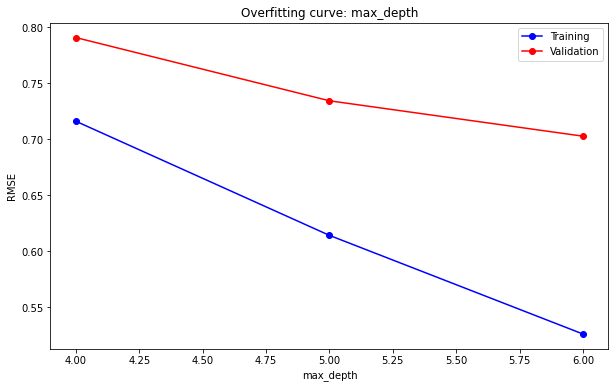

In [ ]:
%%time
test_param_and_plot(XGBRegressor,"max_depth", [4, 5, 6], **best_params)

In [ ]:
best_params['max_depth'] = 6

### **Learning Rate**

CPU times: user 1h 3s, sys: 2min 30s, total: 1h 2min 34s
Wall time: 46min 49s


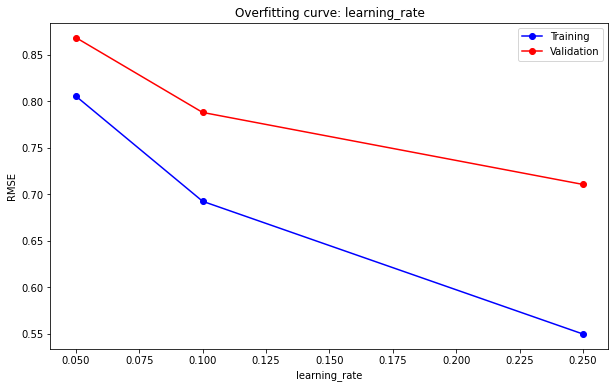

In [ ]:
%%time
test_param_and_plot(XGBRegressor,'learning_rate', [0.05, 0.1, 0.25],**best_params)

In [ ]:
best_params['learning_rate'] = 0.25

### **Subsample**

CPU times: user 3h 34min 40s, sys: 8min 26s, total: 3h 43min 7s
Wall time: 2h 51min 26s


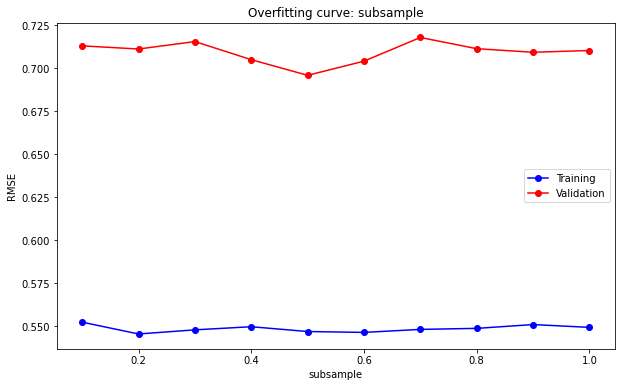

In [ ]:
%%time
test_param_and_plot(XGBRegressor,"subsample",list(np.arange(0.1,1.1,0.1)),**best_params)

In [ ]:
best_params['subsample'] = 0.5

In [ ]:
xgb_model_hyper = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=250, max_depth=6, learning_rate=0.25, 
                               subsample=0.5)

In [ ]:
xgb_model_hyper.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.25, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=250, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
evaluate(xgb_model_hyper)

(0.5470386, 0.6959111)

The training and validation rmse are 0.6545 and 0.7560 respectively.
Let us evaluate the model on test data and submit the predictions to Kaggle.

In [ ]:
predict_and_submit(xgb_model_hyper, 'xgb_hyper_submission.csv')

100%|██████████| 834/834 [04:32<00:00,  3.06it/s]


row_id  meter_reading
0                0      53.776253
1                1      15.324471
2                2       5.334359
3                3      75.716034
4                4     211.995773
...            ...            ...
41697595  41697595       6.005662
41697596  41697596       5.346701
41697597  41697597       6.011677
41697598  41697598     141.985992
41697599  41697599       3.504913

[41697600 rows x 2 columns]

![](https://i.imgur.com/pMCz8f5.jpg)

## **6. Summary and Future Work**

* The objective of the project was to forecast energy consumption for metered buildings using different features. 
* In this project we dowloaded a large dataset from Kaggle's competition dataset, and performed cleaning, preprocessing and visualized it.
* With EDA, we selected features and trained them on multiple machine learning models to predict energy outcomes.
* With hyperparameter tuning on boosting models, we were able to reduce RMSE, and improve our position on the Kaggle competition leaderboard. 
* With limited computing resource and time constraint, we were able to get within 70% of the competition leaderboard. 
* We can further improve on our score by 
  - Taking into consideration external features not provided in the dataset
  - Reducing data leakage, as mentioned in the discussions thread on the competition page 
  - Training our models on each meter type separately





## **7. References**
* Dataset link: https://www.kaggle.com/competitions/ashrae-energy-prediction/data
-  Aakash N S, Analyzing tabular data using Python and Pandas, 2021. https://jovian.ai/aakashns/python-pandas-data-analysis
- Aakash N S, Data Visualization using Python, Matplotlib and Seaborn, 2021. https://jovian.ai/aakashns/python-matplotlib-data-visualization
- Aakash N S, Interactive Visualization using Plotly, 2021. https://jovian.ai/aakashns/interactive-visualization-plotly
- Aakash N S, Workshop - Machine Learning Project from Scratch. https://jovian.com/learn/zero-to-data-analyst-bootcamp/lesson/workshop-machine-learning-project-from-scratch
- Kaggle (for dataset) - https://www.kaggle.com/
- StackOverflow (for queries) - https://stackoverflow.com/
- Kaggle notebook by Ceren Iyim - https://www.kaggle.com/code/cereniyim/save-the-energy-for-the-future-1-detailed-eda#-2.-Exploratory-Data-Analysis-
- Kaggle notebook by Aravind Krishnan https://www.kaggle.com/code/aravindankrishnan/ashrae-step-by-step-eda
